In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt

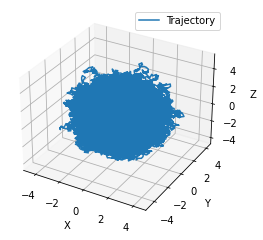

In [9]:
# Define the acceptance ratio function
def acceptance_ratio(r, r_new):
    if r_new**2 - r**2 < 0:
        return 1
    else:
        return np.exp(-0.5 * (r_new**2 - r**2))

# Define the random step function
def random_step(h):
    return np.random.uniform(-h/2, h/2, 3) / 2

# Initialize parameters
N = 1000000 # Number of iterations
origin = np.array([0, 0, 0])
h = 1  # Step size

# Initialize the starting point
r = origin


# List to store the positions
positions = []

# Perform the Metropolis algorithm
for i in range(N):
    r_new = r + random_step(h)
    if acceptance_ratio(np.linalg.norm(r - origin), np.linalg.norm(r_new - origin)) >= np.random.uniform(0, 1):
        r = r_new
    positions.append(r)

# Convert positions to a numpy array for easier slicing
positions = np.array(positions)

# Plot the trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], label='Trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


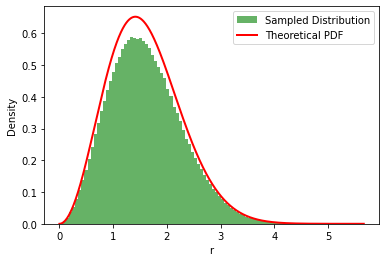

In [10]:
from scipy.stats import norm

# Assuming `positions` is the array of sampled points from the Metropolis algorithm
# Calculate the radial distances from the origin
radii = np.linalg.norm(positions, axis=1)

# Plot the histogram of the radial distances
plt.hist(radii, bins=100, density=True, alpha=0.6, color='g', label='Sampled Distribution')

# Plot the theoretical PDF 
r = np.linspace(0, np.max(radii), 1000)
pdf = r**2/2*np.sqrt(np.pi) * np.exp(-r**2 / 2)  # Theoretical PDF for the radial distance in 3D
plt.plot(r, pdf, 'r-', lw=2, label='Theoretical PDF')

plt.xlabel('r')
plt.ylabel('Density')
plt.legend()
plt.show()

In [11]:
# Calculate the integral of the function 
def function(X, Y, Z):
    r = X**2 + Y**2 + Z**2
    value = np.exp(-r/2) * (X + Y + Z)**2
    return value

def pdf(r):
    return (np.pi*2)**(-3/2) * np.exp(-r**2 / 2)

# Extract X, Y, Z coordinates from positions
X = positions[:, 0]
Y = positions[:, 1]
Z = positions[:, 2]

# Evaluate the function at these points
function_values = function(X, Y, Z)/pdf(np.linalg.norm(positions, axis=1))

# Evaluate the PDF at these points
average_value = function_values.mean()

# Calculate the integral
integral = average_value

print(f"Estimated value of the integral: {integral}")

Estimated value of the integral: 47.12668633230351


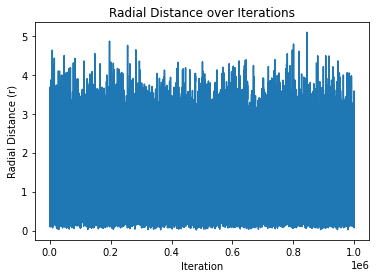